## FWF Data Inspection
-----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply

import pulsewaves_pb2 as pwproto # make sure that pulsewaves_pb2.py is in the same directory as the notebook

import als 

### Parse PWMsg data

In [2]:
pw_list = pwproto.PWListP()
f = open('../data/pwmsg/10552_NYU_M2_Pulse_Waves_MTA_Resolved-Scanner1-190511_161348_1-originalpoints-0.pwmsg', 'rb')
pw_list.ParseFromString(f.read())
f.close()

num_pls = len(pw_list.pulse)
print('number of pulses parsed: {0}'.format(num_pls))

number of pulses parsed: 100000


### Number of samplings

In [4]:
num_samplings_per_pulse = pd.Series([len(pls.channels) for pls in pw_list.pulse])
print('numbers of samplings per pulse: {0}'.format(num_samplings_per_pulse.unique()))

numbers of samplings per pulse: [2 3]


In [5]:
tt = 0
for n in num_samplings_per_pulse.unique():
    idx=num_samplings_per_pulse.index[num_samplings_per_pulse==n]
    print('number of pulses with {0} samplings: {1}'.format(n, len(idx)))
    tt += len(idx)
    
assert(tt == num_pls)

number of pulses with 2 samplings: 35682
number of pulses with 3 samplings: 64318


### Pulse descriptor index

In [6]:
desc_idx = pd.Series([pls.pulseDescriptorIndex for pls in pw_list.pulse])
print('pulse descriptor indices: {0}'.format(desc_idx.unique()))

pulse descriptor indices: [2 3 5 4 6]


In [7]:
tt = 0
for n in desc_idx.unique():
    idx=desc_idx.index[desc_idx==n]
    print('number of pulses with pulse descriptor #{0}: {1}'.format(n, len(idx)))
    tt += len(idx)
    
assert(tt == num_pls)

number of pulses with pulse descriptor #2: 25221
number of pulses with pulse descriptor #3: 49888
number of pulses with pulse descriptor #5: 6705
number of pulses with pulse descriptor #4: 10461
number of pulses with pulse descriptor #6: 7725


### Close look at a pusle with 2 samplings

Print a pulse as JSON

In [8]:
n = 2
idx=num_samplings_per_pulse.index[num_samplings_per_pulse==n]
pls = pw_list.pulse[idx[0]]
print(pls)

timestamp: 15232594729
channels {
  channel: 0
  sampleUnit: 1.0
  waveSegment {
    durationFromAnchor: -12.999341011047363
    echo: 4
    echo: 2
    echo: 1
    echo: 1
    echo: 2
    echo: 2
    echo: 2
    echo: 2
    echo: 7
    echo: 25
    echo: 63
    echo: 121
    echo: 174
    echo: 191
    echo: 163
    echo: 109
    echo: 59
    echo: 28
    echo: 12
    echo: 6
    echo: 4
    echo: 5
    echo: 7
    echo: 5
  }
}
channels {
  channel: 1
  sampleUnit: 1.0
  waveSegment {
    durationFromAnchor: -231.46734619140625
    echo: 2
    echo: 3
    echo: 2
    echo: 2
    echo: 2
    echo: 2
    echo: 2
    echo: 3
    echo: 3
    echo: 3
    echo: 3
    echo: 3
    echo: 4
    echo: 8
    echo: 11
    echo: 12
    echo: 10
    echo: 6
    echo: 3
    echo: 4
    echo: 2
    echo: 3
    echo: 2
    echo: 3
    echo: 3
    echo: 3
    echo: 3
    echo: 3
    echo: 3
    echo: 2
    echo: 2
    echo: 2
    echo: 1
    echo: 2
    echo: 2
    echo: 2
    echo: 1
    echo: 1
    e

### Close look at a pusle with 3 samplings

Print a pulse as JSON

In [9]:
n = 2
idx=num_samplings_per_pulse.index[num_samplings_per_pulse==n]
pls = pw_list.pulse[idx[0]]
print(pls)

timestamp: 15232594729
channels {
  channel: 0
  sampleUnit: 1.0
  waveSegment {
    durationFromAnchor: -12.999341011047363
    echo: 4
    echo: 2
    echo: 1
    echo: 1
    echo: 2
    echo: 2
    echo: 2
    echo: 2
    echo: 7
    echo: 25
    echo: 63
    echo: 121
    echo: 174
    echo: 191
    echo: 163
    echo: 109
    echo: 59
    echo: 28
    echo: 12
    echo: 6
    echo: 4
    echo: 5
    echo: 7
    echo: 5
  }
}
channels {
  channel: 1
  sampleUnit: 1.0
  waveSegment {
    durationFromAnchor: -231.46734619140625
    echo: 2
    echo: 3
    echo: 2
    echo: 2
    echo: 2
    echo: 2
    echo: 2
    echo: 3
    echo: 3
    echo: 3
    echo: 3
    echo: 3
    echo: 4
    echo: 8
    echo: 11
    echo: 12
    echo: 10
    echo: 6
    echo: 3
    echo: 4
    echo: 2
    echo: 3
    echo: 2
    echo: 3
    echo: 3
    echo: 3
    echo: 3
    echo: 3
    echo: 3
    echo: 2
    echo: 2
    echo: 2
    echo: 1
    echo: 2
    echo: 2
    echo: 2
    echo: 1
    echo: 1
    e

### Close look at a pusle with descriptor index 2
1 x RP, 1 x LP, 0 x HP

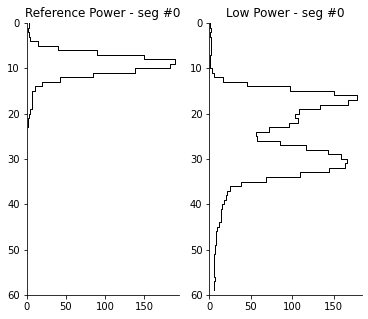

In [10]:
n = 2
idx=desc_idx.index[desc_idx==n]
pls = pw_list.pulse[idx[7]]
#print(pls) # uncomment this if you want to read the pulse as JSON
fig, axes = als.plot_waves(pls)

### Close look at a pusle with descriptor index 3
1 x RP, 1 x LP, 1 x HP

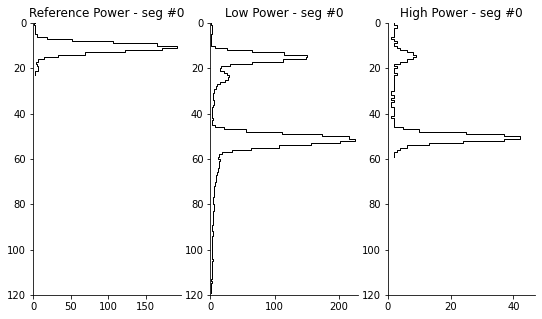

In [11]:
n = 3
idx=desc_idx.index[desc_idx==n]
pls = pw_list.pulse[idx[4]]
#print(pls) # uncomment this if you want to read the pulse as JSON
fig, axes = als.plot_waves(pls)

### Close look at a pusle with descriptor index 4
1 x RP, 2 x LP, 0 x HP

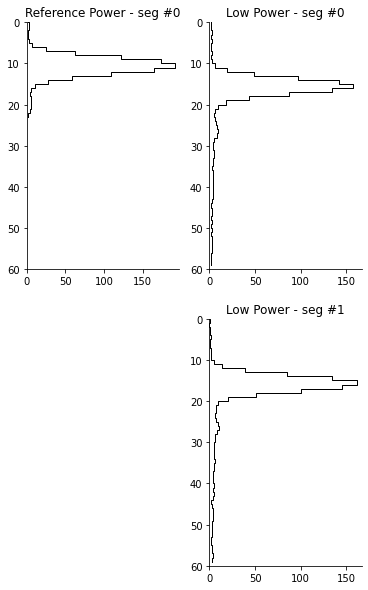

In [12]:
n = 4
idx=desc_idx.index[desc_idx==n]
pls = pw_list.pulse[idx[0]]
#print(pls) # uncomment this if you want to read the pulse as JSON
fig, axes = als.plot_waves(pls)

### Close look at a pusle with descriptor index 5
1 x RP, 2 x LP, 1 x HP

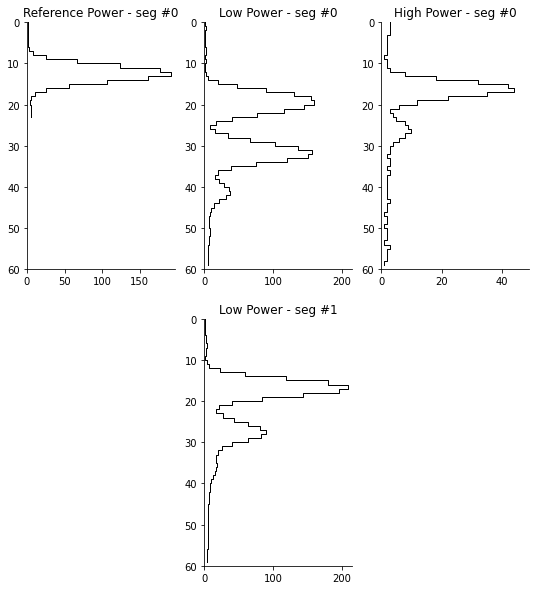

In [13]:
n = 5
idx=desc_idx.index[desc_idx==n]
pls = pw_list.pulse[idx[0]]
#print(pls) # uncomment this if you want to read the pulse as JSON
fig, axes = als.plot_waves(pls)